## Import

In [20]:
from sklearn.metrics import fowlkes_mallows_score, adjusted_mutual_info_score, adjusted_rand_score
from genieclust.plots import plot_scatter
from spectral import spectral_clustering, spectral_clustering2

import sklearn.datasets.samples_generator as sg
import numpy as np

## Metoda testująca

In [21]:
def testuj(zbior, metoda=spectral_clustering, **kwargs):
    def __indeksy(labs, labs_pred):
        """ Funkcja wypisuje indeksy podobieństwa k-podziałów etykiet oryginalnych i tych przewidywanych. """
        print("FM:", fowlkes_mallows_score(labs, labs_pred))
        print("AM:", adjusted_mutual_info_score(labs, labs_pred))
        print("AR:", adjusted_rand_score(labs, labs_pred))
    
    # Wczytanie zbioru i etykiet
    data   = np.loadtxt(zbior+".data.gz", ndmin=2)
    labels = np.loadtxt(zbior+".labels0.gz")
    
    # Odczytanie działania wyniku algorytmu
    labels_predicted = metoda(data, **kwargs)
    
    # Porównanie z oryginalnymi etykiatmi
    plot_scatter(data, labels_predicted)
    __indeksy(labels, labels_predicted)

# Zbiór nr 1 -- *rozległe skupienia*

In [22]:
X1a, y1a = sg.make_blobs(random_state=58)

X1b, y1b = sg.make_blobs(centers=1, random_state=58, cluster_std=2)
X1b += [-4, -5]
y1b += 3

## Wygląd zbioru

Zbiór składa się z czterach skupień delikatnie „zahaczających” o siebie. Dodatkowo jeden ze zbiorów jest mocniej rozproszony niż pozostałe.

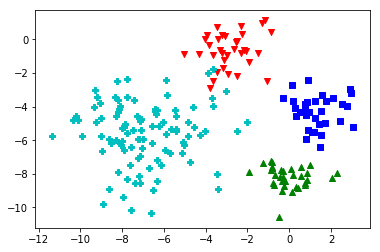

In [23]:
data1   = np.concatenate((X1a, X1b))
labels1 = np.concatenate((y1a, y1b))
plot_scatter(data1, labels1)

# np.savetxt("zbiory/spread.data", data1, fmt="%.3f")
# np.savetxt("zbiory/spread.labels0", labels1, fmt="%d")

## Test algorytmu

### $M=5$

FM: 0.9202204111988255
AM: 0.8713293764816568
AR: 0.8821385485674855


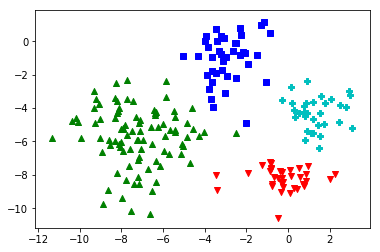

In [24]:
testuj("zbiory/spread", k=4, M=5)

### $M=15$

#### Uspójnianie "koniec z końcem"

FM: 0.9397556191794928
AM: 0.8938837735238148
AR: 0.9107676061046948


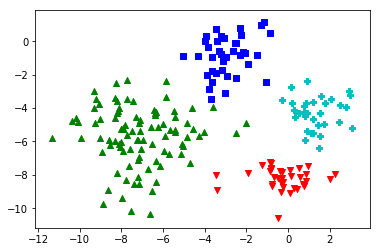

In [25]:
testuj("zbiory/spread", k=4, M=15)

#### Uspójnianie po najmniejszych odległościach

FM: 0.9397556191794928
AM: 0.8938837735238148
AR: 0.9107676061046948


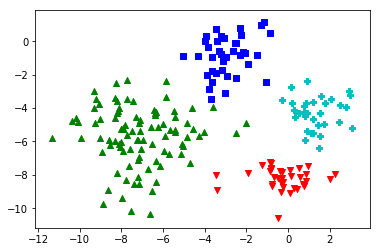

In [26]:
testuj("zbiory/spread", metoda=spectral_clustering2, k=4, M=15)

### Interpretacja testu

Algorytm jest dość podatny na mylenie nachodzących na siebie skupień. Wygląda na to, że istotny wpływ na przypisanie do danego skupienia ma odległość tego punktu od „centrum” tego skupienia.

Dodatkowo pokazuję tu, że działają obie wersje uspójniania, które zaimplementowałem -- pierwsza, czyli „koniec z końcem”, która uspójnia przez łączenie krawędziami kolejnych spójnych składowych (największy indeks z najmniejszym) oraz druga, która dołącza kolejne składowe do pierwszej z nich za pomocą najkrótszej krawędzi.

# Zbiór nr 2 -- *splecione zbiory*

## Wygląd zbioru

Zbiór składa się z dwóch prawie w pełni pokrywających się zbiorów znaczników.

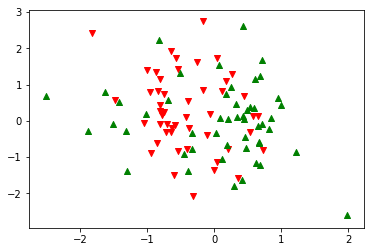

In [27]:
data2, labels2 = sg.make_classification(
    n_features=7, n_informative=3, n_classes=2, n_clusters_per_class=3, random_state=58)
plot_scatter(data2, labels2)

# np.savetxt("zbiory/splecione.data", data2, fmt="%.3f")
# np.savetxt("zbiory/splecione.labels0", labels2, fmt="%d")

## Test algorytmu

### $M=3$

#### Uspójnianie "koniec z końcem"

FM: 0.5414777466567863
AM: 0.02041443377610548
AR: 0.023964688764718148


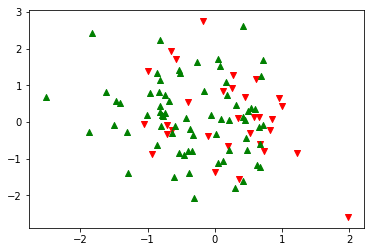

In [28]:
testuj("zbiory/splecione", k=2, M=3)

#### Uspójnianie po najmniejszych odległościach

FM: 0.5414777466567863
AM: 0.02041443377610548
AR: 0.023964688764718148


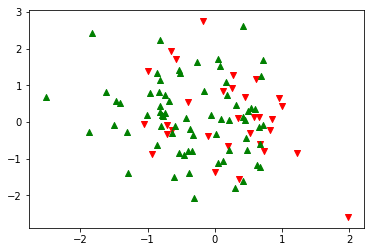

In [29]:
testuj("zbiory/splecione", metoda=spectral_clustering2, k=2, M=3)

### $M=85$

FM: 0.6621702284843712
AM: 0.06641820496539465
AR: 0.017014450129431202


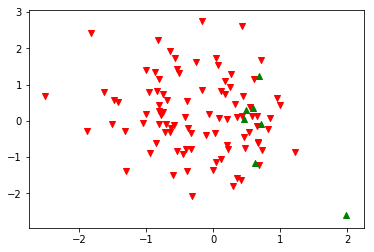

In [30]:
testuj("zbiory/splecione", k=2, M=85)

### Interpretacja testu

W porównaniu do testów na zbiorze nr 3 algorytm zaskakująco dobrze radzi, gdy skupienia są na siebie bardzo nałożone. Przykład dla $M=85$ bardzo dobrze pokazuje, że mierzenie dokładności algorytmu tylko jednym indeksem, bez weryfikacji z innymi jest nie najlepszym pomysłem.

# Zbiór nr 3 -- *crosshair*

## Generowanie

In [31]:
e1 = 1.5
lims = 0.15

X_e1, y_e1 = sg.make_circles(n_samples=300, random_state=58, factor=0.9)

X, y, e = X_e1, y_e1, e1
dropy = []
for i in range(X.shape[0]):
    if -lims < X[i][1] and X[i][1] < lims and y[i] == 1:
        dropy.append(i)

X_e1 = np.delete(X, dropy, axis=0) * e
y_e1 = np.delete(y, dropy)

In [32]:
e2 = 1
lims = 0.15
X_e2, y_e2 = sg.make_circles(n_samples=150, random_state=58)

X, y, e = X_e2, y_e2, e2
dropy = []
for i in range(X.shape[0]):
    if -lims < X[i][0] and X[i][0] < lims and y[i] == 0:
        dropy.append(i)

X_e2 = np.delete(X, dropy, axis=0) * e
y_e2 = np.delete(y, dropy)

In [33]:
X_e3, y_e3 = sg.make_circles(n_samples=30, random_state=58)
y_e3 = np.zeros(len(y_e3), dtype=np.int)
X_e3 *= [0.25, 0]
X_e3 += [1.25, 0]

X_e4 = -X_e3
y_e4 = y_e3

In [34]:
X_e5, y_e5 = sg.make_circles(n_samples=30, random_state=58)
y_e5 = np.ones(len(y_e3), dtype=np.int)
X_e5 *= [0, 0.25]
X_e5 += [0, 1.07]

X_e6 = -X_e5
y_e6 = y_e5

## Wygląd zbioru

Wygląd zbioru można porównać do celownika z gier komputerowych. Docelowo zbiór miał składać się z poprzeplatanych różnych skupień, które są blisko siebie. Dodatkowo te same skupienia są połączone ze sobą.

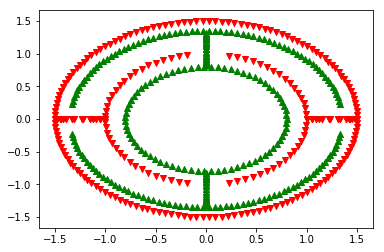

In [35]:
data3   = np.concatenate((X_e1, X_e2, X_e3, X_e4, X_e5, X_e6))
labels3 = np.concatenate((y_e1, y_e2, y_e3, y_e4, y_e5, y_e6))
plot_scatter(data3, labels3)

# np.savetxt("zbiory/crosshair.data", data3, fmt="%.3f")
# np.savetxt("zbiory/crosshair.labels0", labels3, fmt="%d")

## Test algorytmu

### $M=8$

FM: 0.49820204062826545
AM: -0.0013216991858989592
AR: -0.0018312590372681582


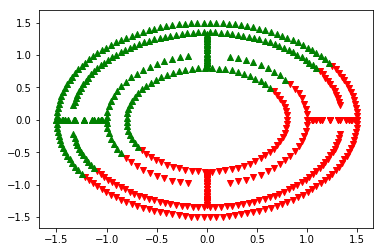

In [36]:
testuj("zbiory/crosshair", k=2, M=8)

### $M=30$

FM: 0.49820204062826545
AM: -0.0013216991858989592
AR: -0.0018312590372681582


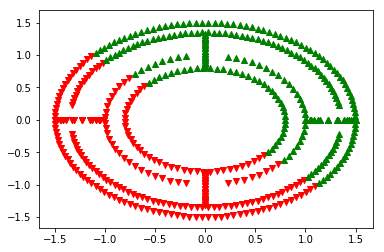

In [37]:
testuj("zbiory/crosshair", k=2, M=30)

### $M=500$

FM: 0.6457245919706671
AM: 0.14226044749544312
AR: 0.06257242735407595


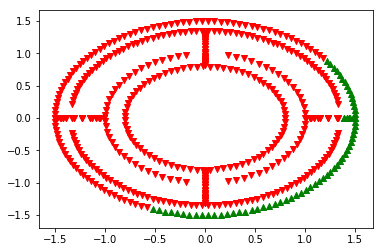

In [38]:
testuj("zbiory/crosshair", k=2, M=500)

### Interpretacja testu

Widzimy, że zmiana liczby najbliższych sąsiadów $M$ nie wpływa w żaden sposób na wynik działania algorytmu na tym zbiorze. Jedyny efekt jest taki, że indeksy wzrosły, aczkolwiek etykiety nadal nie były zbyt dobrze dopasowane. Przypuszczam, że algorytm priorytetyzuje odległości między punktami w rozpoznawaniu skupień, przez co otrzymany wynik jest taki, a nie inny.